<a href="https://colab.research.google.com/github/je-r/TensorFlow/blob/master/pandas_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# import Pandas and show its version:
from __future__ import print_function
import pandas as pd
pd.__version__

'0.22.0'

In [52]:
# example how to create Series object:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

In [53]:
# DataFrame object consists of rows and named columns,
# so column-wise DataFrame consists of Series 
# of column names, and one Series of values for each column:

city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })


,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [54]:
# now let's load data from the Internet:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [55]:
# let's take a look at first rows (records):
california_housing_dataframe.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e9bf82da0>]],
      dtype=object)

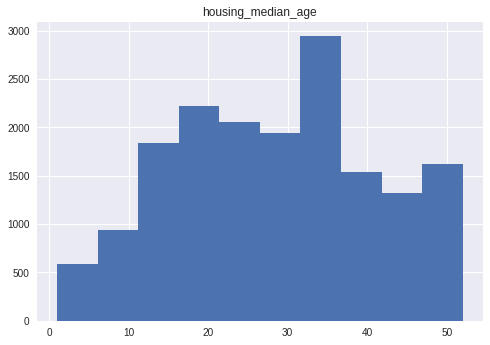

In [56]:
# let's take a look at data visually:
california_housing_dataframe.hist('housing_median_age')


In [57]:
# accessing data, via Python dictionary:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [58]:
# accessing data, one element:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [59]:
# accessing data, range:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


In [60]:
#data manipulation (TODO: check why "." needed):
population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

In [61]:
# data manipulation, using Numpy library:

import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

In [62]:
# data manipulation, applying on Series elements:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

In [63]:
# data manipulation, modification:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


In [64]:
# excercise: 
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


In [65]:
# indexes that Panda assigns

print(city_names.index)
print(cities.index)


RangeIndex(start=0, stop=3, step=1)
RangeIndex(start=0, stop=3, step=1)


In [66]:
# indexes, re-indexing (purpose: to re-order rows):
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


In [67]:
# indexes, random (every time you run this cell, it's different!) re-ordering via permutation:
cities.reindex(np.random.permutation(cities.index))


,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
2,Sacramento,485199,97.92,4955.055147,False
1,San Jose,1015785,176.53,5754.177760,True


In [69]:
# indexes, using index values that didn't exist in original DataFrame:
cities.reindex([0, 4, 5, 2])

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469.0,46.87,18187.945381,False
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False
